# Assignment 3

### Submitted by Ashutosh Bandooni

Data Collection

In [85]:
data = pd.read_csv("Titanic-Dataset.csv")

Data Preprocessing

In [86]:
import numpy as np 
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [87]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
data.shape

(891, 12)

Checking for null values

In [89]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Dropping columns having more than 70 percent null values

In [90]:
data = data.drop(columns="Cabin",axis=1)

Dropping rows where age is not mentioned

In [91]:
data.dropna(subset=['Age'], inplace=True)

In [92]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [93]:
data.shape

(714, 11)

In [94]:
pclasses = data['Pclass'].unique()
pclasses

array([3, 1, 2], dtype=int64)

In [95]:
parents_children = data['Parch'].unique()

In [96]:
parents_children

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [97]:
siblings_spouses = data['SibSp'].unique()
siblings_spouses

array([1, 0, 3, 4, 2, 5], dtype=int64)

Data Visualisation

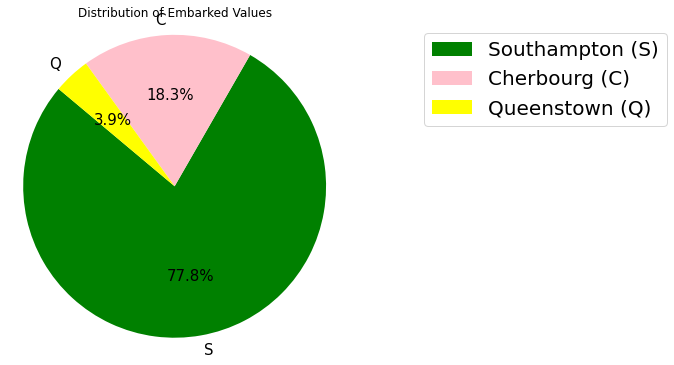

In [98]:
#Pie-chart of Embarked Classes
embarked_counts = data['Embarked'].value_counts()

colors = ['green', 'pink', 'yellow']

plt.figure(figsize=(6, 6))
plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', startangle=140,
        colors=colors, textprops={'fontsize': 15})
plt.title('Distribution of Embarked Values')


legend_labels = ['Southampton (S)', 'Cherbourg (C)', 'Queenstown (Q)']
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(2, 1),fontsize = "20")


plt.gca().set_facecolor('white')

plt.axis('equal')

# Show the pie chart
plt.show()

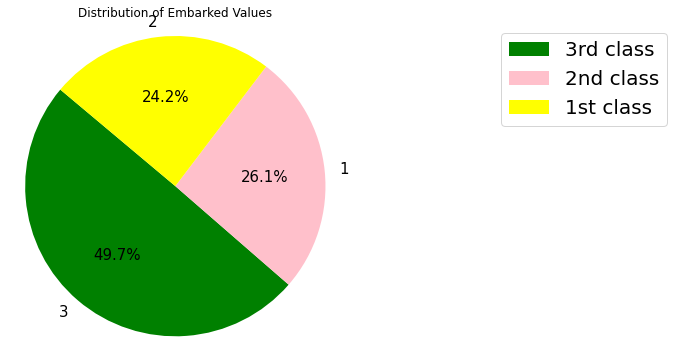

In [99]:
#Pie-chart of Passeneger Classes
pclasscount = data['Pclass'].value_counts()

colors = ['green', 'pink', 'yellow']

plt.figure(figsize=(6, 6))
plt.pie(pclasscount, labels=pclasscount.index, autopct='%1.1f%%', startangle=140,
        colors=colors, textprops={'fontsize': 15})
plt.title('Distribution of Embarked Values')


legend_labels = ['3rd class', '2nd class', '1st class']
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(2, 1),fontsize = "20")


plt.gca().set_facecolor('white')

plt.axis('equal')

# Show the pie chart
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Count'>

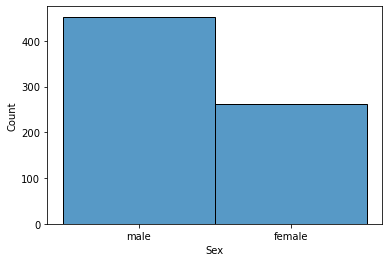

In [100]:
sns.histplot(data = data, x = "Sex")

<AxesSubplot:xlabel='Sex', ylabel='Count'>

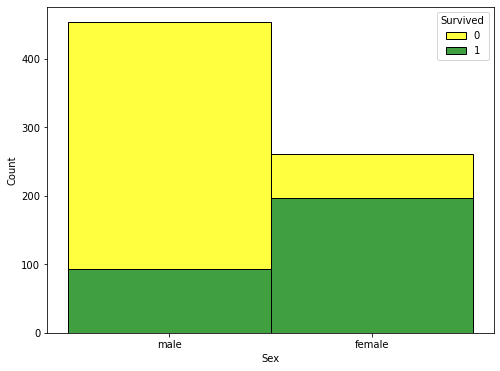

In [101]:
#Highlighting survivors sex-wise
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Sex', hue='Survived', multiple='stack', palette={0: 'yellow', 1: 'green'},binwidth=0.8)

Outlier Detection

In [102]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [103]:
cols = ['Age','Fare']
for col in cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
        
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    print("Outliers in the", col, "column:")
    print(outliers)

Outliers in the Age column:
     PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
280          281         0       3                      Duane, Mr. Frank   
456          457         0       1             Millet, Mr. Francis Davis   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Embarked

Text(0.5, 0, 'Columns')

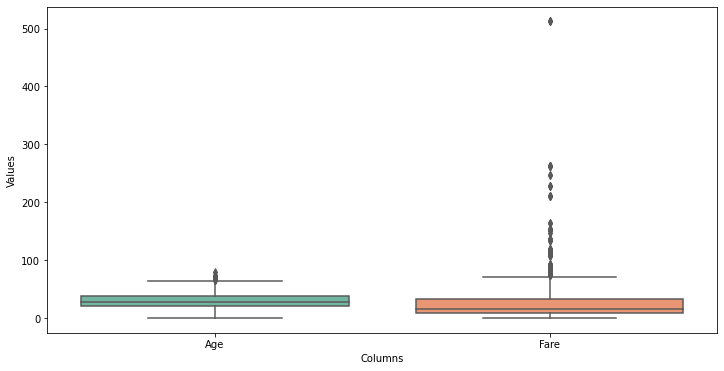

In [104]:
#visual representation
numerical_columns = ['Age', 'Fare']

plt.figure(figsize=(12,6))
sns.boxplot(data=data[numerical_columns], palette='Set2')
plt.ylabel("Values")
plt.xlabel("Columns")


Performing Encoding

In [105]:
#We can encode Sex and embarked columns

data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [106]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


Feature Scaling

<AxesSubplot:xlabel='Fare', ylabel='Density'>

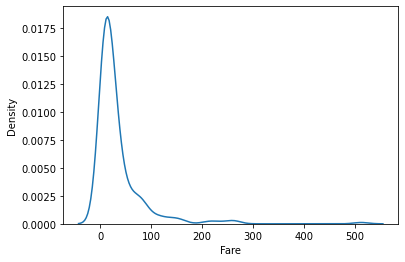

In [107]:
sns.kdeplot(data,x="Fare")

<AxesSubplot:xlabel='Age', ylabel='Density'>

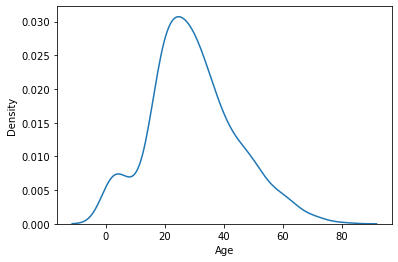

In [108]:
sns.kdeplot(data,x="Age")

In [109]:
numerical_columns = ['Fare']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

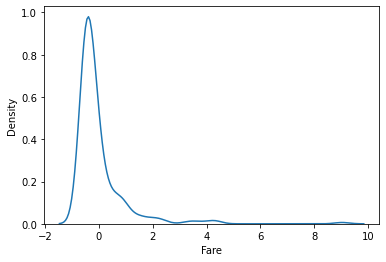

In [110]:
sns.kdeplot(data,x="Fare")

In [ ]:
#Column "Fare" has been scaled

Splitting dependent and independent variables now

In [112]:
y = data['Survived']
independentcolumns = [col for col in data.columns if col!="Survived"]
X = data[independentcolumns]
        

Train-test-split

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [117]:
X_train.shape

(571, 11)

In [118]:
X_test.shape

(143, 11)